*This notebook was created by [Emeka Obiefuna](https://twitter.com/itsdonmonc). For any feedback, errors or suggestion, he can be reached on email (itsdonmonc at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/donmonc).*

<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1XeNPQrtNVrup5YzGFEwyWr47p6dN3RIN?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Read In Colab"/></a>
  </td>
</table>

# Section A <center> <u>Data Ingestion and API Communication</u> <center>

Ingest github data of techies or github users in the Machine learning Field in the following locations on github. (Lagos, Nigeria, Rwanda). It is expected that you use the github search for users API for this task. The final result for this task should be a dataframe that contains details of Github Users who do Machine Learning from the three location tags indicated above. A sample search Keyword for users would be like “Machine Learning location: Lagos” 
> a. The expected data points to be ingested or seen in the dataframe include name, login/username, Bio, Blog, Company, email, 
followers(count of followers), following(count of following), id, url, 
and location.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from github import Github

In [2]:
access_token = 'ghp_i_dont_know-my-name_XOqFJmPD'  #<--- My access token was intentionally doctored for security purpose.

In [3]:
def get_user_info(place, keyword = 'Machine Learning', g = Github(access_token)):
    
    
    Location = g.search_users(keyword, location= place)
    
    Location_df = pd.DataFrame({
        'user_id' : [user.id for user in Location],
        'username' : [user.login for user in Location],
        'bio' : [user.bio for user in Location],
        'blog' : [user.blog for user in Location],
        'company' : [user.company for user in Location],
        'email' : [user.email for user in Location],
        'followers' : [user.followers for user in Location],
        'following' : [user.following for user in Location],
        'profile_url' : [user.html_url for user in Location],
        'location' : [user.location for user in Location]
    })
    
    filename = place + '_MLE.csv'
    Location_df.to_csv(filename, sep=',', encoding='utf-8', index=False)

In [4]:
target_locations = ["Lagos", "Nigeria", "Rwanda"]

In [5]:
for x in target_locations:
    get_user_info(x)

In [6]:
Lag_df = pd.read_csv('Lagos_MLE.csv')
NGN_df = pd.read_csv('Nigeria_MLE.csv')
RWD_df = pd.read_csv('Rwanda_MLE.csv')

In [7]:
print(f'The search query found {Lag_df.shape[0]} Machine Learning Engineers in Lagos\nThe search query found {NGN_df.shape[0]} Machine Learning Engineers in Nigeria\nThe search query found {RWD_df.shape[0]} Machine Learning Engineers in Rwanda')

The search query found 228 Machine Learning Engineers in Lagos
The search query found 446 Machine Learning Engineers in Nigeria
The search query found 31 Machine Learning Engineers in Rwanda


In [8]:
MLE_data = pd.concat([Lag_df, NGN_df, RWD_df], axis=0)

#### Drop Duplicates

In [9]:
def remove_duplicate(data):
    print(f'No. of Rows -- Before Removing Duplicates: {data.shape[0]}')
    data.drop_duplicates(keep='first', inplace=True)
    print('No. of Rows -- After Removing Duplucates: {}'.format(data.shape[0]))

remove_duplicate(MLE_data)

No. of Rows -- Before Removing Duplicates: 705
No. of Rows -- After Removing Duplucates: 523


In [10]:
MLE_data.sample(10)

user_id          username  \
171  69028256           iamveso   
155  45826981       phillip1996   
260  74600283    IsikawilliamXY   
143  70514310          ches-001   
37   33260759  Abubakarharuna10   
25   39874083         elotech47   
303  64735238      EsosaAsemota   
25   47627868        AbimbolaOO   
23   33873524       Clare-Joyce   
18   38889456         jideilori   

                                                   bio  \
171  I love programming!\r\nOn a professional level...   
155  Data Analyst & Visualization engineer || Stati...   
260  Mechanical engineer | Data science (Machine le...   
143  A data science and machine learning enthusiast...   
37   AI For IoT | Machine Learning | \r\nDeep Learn...   
25                       machine learning Engineer\r\n   
303  Mechanical Engineering and Machine learning en...   
25          iOS Developer | Machine Learning Engineer    
23   Interested in smart energy systems, machine le...   
18                Machine learning and computer vision   

                                                  blog  \
171                                                NaN   
155                                                NaN   
260  https://www.linkedin.com/in/william-isika-80aa...   
143  https://www.kaggle.com/henrychibueze/code?scro...   
37                                 Abbanso10@gmail.com   
25                                                 NaN   
303                  https://linkedin/in/esosa-asemota   
25                                                 NaN   
23      https://www.linkedin.com/in/ngoranclarejoycef/   
18                                                 NaN   

                    company                         email  followers  \
171                     NaN                           NaN          2   
155              freelancer                           NaN          0   
260  www.praizemusic.com.ng       isikawilliam9@gmail.com          2   
143                     NaN                           NaN          7   
37                  Student                           NaN          9   
25                    Xigma  eloghosaefficiency@gmail.com          5   
303                     NaN                           NaN          0   
25                      NaN                           NaN          5   
23                    nLine        joycetirnyuy@gmail.com          0   
18                      NaN         jideilori77@gmail.com         10   

     following                          profile_url  \
171          4           https://github.com/iamveso   
155          1       https://github.com/phillip1996   
260          5    https://github.com/IsikawilliamXY   
143          4          https://github.com/ches-001   
37          13  https://github.com/Abubakarharuna10   
25          25         https://github.com/elotech47   
303          0      https://github.com/EsosaAsemota   
25           3        https://github.com/AbimbolaOO   
23           5       https://github.com/Clare-Joyce   
18           2         https://github.com/jideilori   

                                location  
171                       Lagos, Nigeria  
155                  lekki lagos-Nigeria  
260                              Nigeria  
143  Nigeria, River State, Port-Harcourt  
37                               Nigeria  
25                               Nigeria  
303                              Nigeria  
25                        Lagos, Nigeria  
23                        Kigali, Rwanda  
18                               Nigeria

# Section B

# <center> <u> Unsupervised Segmentation Using Mean-Shift Clustering<u> <center>
    
![image.png](https://sbme-tutorials.github.io/2018/cv/images/mean_shift_tutorial.gif)

> A simple cluster analysis using Mean-shift clustering with a brief explanation on what each cluster might mean with this data. 
    
Mean shift clustering algorithm is a centroid-based algorithm that helps in various use cases of unsupervised learning. It is one of the best algorithms used in image processing and computer vision. So, I'll be performing an unsupervised image segmentation using Mean-Shift clustering algorithm on an image data.

In [11]:
from skimage import data, io

In [12]:
image = data.camera()

In [13]:
def show_image(img, img_title, cmap_type= 'gray'):
    plt.figure(dpi=150)
    io.imshow(img, cmap= cmap_type)
    plt.title(img_title)
    plt.axis('off')
    plt.show()

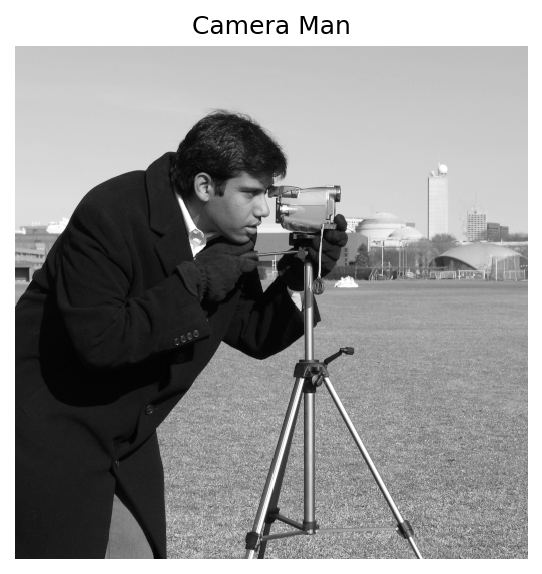

In [14]:
show_image(image, 'Camera Man')

In [15]:
image.shape

(512, 512)

The target of the clustering algorithm is each pixel in the image. And By looking at the image and its shape, we can tell the grayscale image has 262,144 pixels as feature vectors. The image has 1 channel; hence it's in 2-D space.

To use the clustering algorithm on an image data, an `n x d` matrix must be created.<br>
Where;<br>
- n = Number of pixels<br>
- d = Number of channel(s) the image possess.

Since the target is each pixel this time, we need to first create a 262,144 × 1 matrix. This can easily be acheived by reshaping the image

In [16]:
image_reshaped = np.reshape(image, [-1, 1])
image_reshaped.shape

(262144, 1)

In [17]:
X = image_reshaped

**Estimating the Bandwith & Performing Unsupervised Image Segmentation With Mean-Shift Clustering**

Mean shift clustering has one main parameter; which is the bandwidth (or the window size), it needs to be selected with super caution when choosing an appropriate value for it. So, it’s better to have an idea about the bandwidth when doing the modeling. However, since we have no prior knowledge about the data, we need have to first estimate the bandwidth and use the estimated parameter to do the clustering.

In [18]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [19]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)    # Without denoising the image

In [20]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=15.976, bin_seeding=True)

In [21]:
print(f"Shape of labels: {ms.labels_.shape}")
print(f"Shape of the Cluster Centers: {ms.cluster_centers_.shape}")
print(f"Number of Estimated Clusters In The Image: {len(np.unique(ms.labels_))}")

Shape of labels: (262144,)
Shape of the Cluster Centers: (3, 1)
Number of Estimated Clusters In The Image: 3


In [22]:
segmented_image = ms.labels_
segmented_image.shape = image.shape # Reshaping segemented image from a 262144 row vector to a 2D matrix

In [23]:
def plot_comaparison(original_img, segmented_img, title_segmented):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharex=True, sharey=True)
    plt.suptitle('Plot Comparison of Original and Segmented Image', size = 20)
    ax1.imshow(original_img, cmap = 'gray')
    ax1.set_title('Original Image', size = 20)
    ax1.axis('off')
    
    ax2.imshow(segmented_img, cmap = 'viridis')
    ax2.set_title(title_segmented+' '+f'({len(ms.cluster_centers_)} colors, Mean-Shift)', loc= 'center', size = 20)
    ax2.axis('off')
    
    plt.tight_layout(pad = 5)

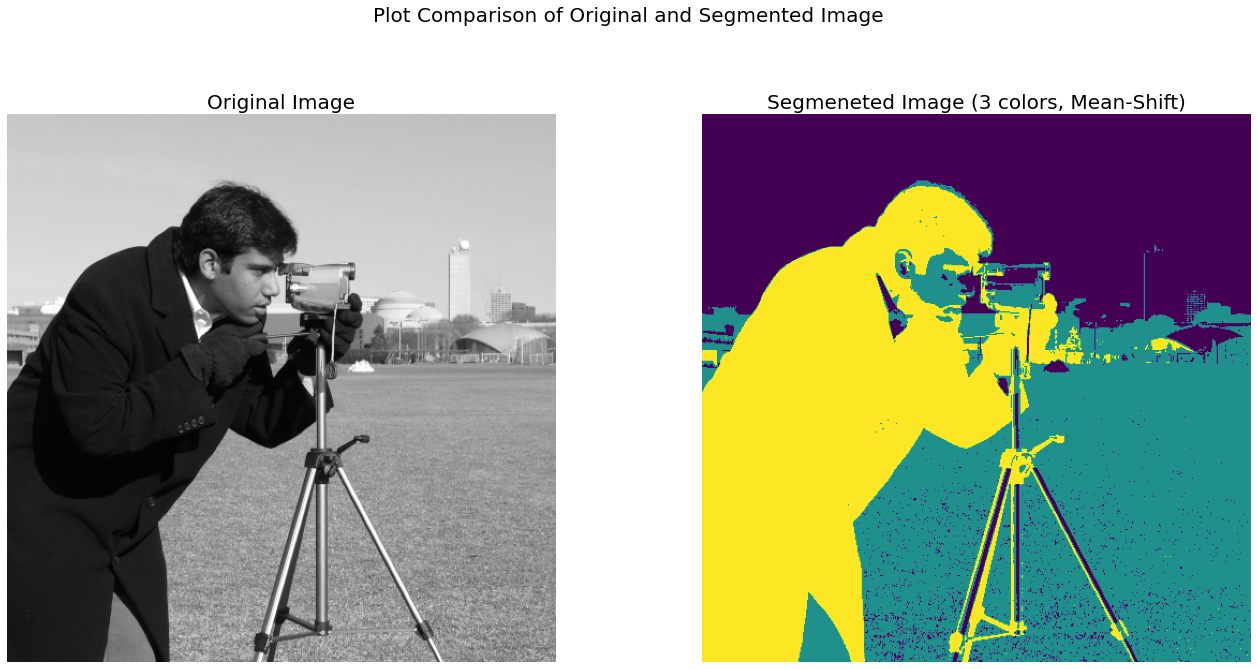

In [24]:
plot_comaparison(image, segmented_image, 'Segmeneted Image')

The camera man image has been segmented into three parts. With Mean-Shift clustering, the model was able to segment the original image of 262,144 pixels into 3 distinct clusters; which is basically the 3 colors present in the image.

# <u> Mean-Shift Clustering With A Tabular Dataset <u><br>
    
While Mean-Shift clustering is mainly used in Image Processing & Computer Vision domain, it can aslo be applied on a tabular data. And because the data set from section A isn't quality enough for a clustering task, let's now implement the Mean Shift Clustering on an artifically generated tabular dataset.

In [25]:
import seaborn as sns
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import plotly as px
import plotly.graph_objs as go

In [26]:
cluster_centers = [[2,4,2], [5,6,8], [5, 13, 13]]

In [27]:
X, _ = make_blobs(n_samples=1000, centers = cluster_centers, cluster_std = 0.6)

**Visualizing The Random Data We Just Created**

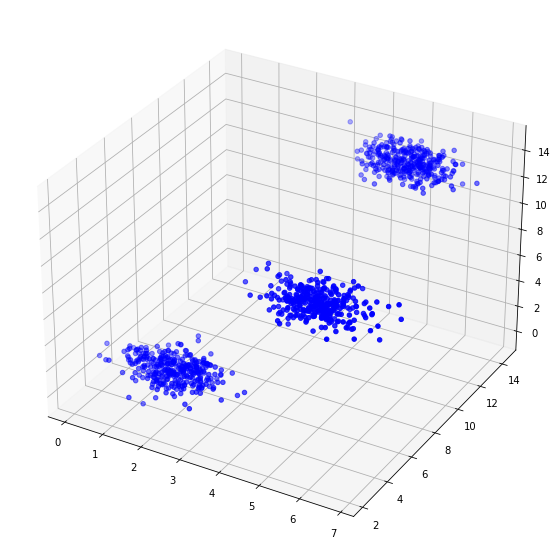

In [28]:
fig = plt.figure(figsize=(12, 10))  
ax = fig.add_subplot(111, projection ='3d')  
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker ='o',color ='blue')  
plt.show()

Plotting An Interactive Visualization of each clusters with their respective coordinates (X, Y, Z)

In [29]:
trace1 = go.Scatter3d(
    x = X[:, 0],
    y = X[:, 1],
    z = X[:, 2],
    mode ='markers',
    marker = dict(color = _ , size= 5, line=dict(color= _, width= 120), opacity=0.8))

data_trace = [trace1]
layout = go.Layout(title = 'The Clusters In The Data',
        scene = dict(
            xaxis = dict(title  = 'feature 1'),
            yaxis = dict(title  = 'feature 2'),
            zaxis = dict(title  = 'feature 3')), height=800, width=800)

fig = go.Figure(data = data_trace, layout = layout)
px.offline.iplot(fig)

We can easily see from the plot above that there can be 3 clusters in the data; which of course, is in accoradnace to the center points  we've randomly created. We'll now proceed with the Mean-Shift clustering algorithm to predict the cluster and define the centroids of the clusters.

As usual, we'll have to first get the estimate of the bandwidth before we clustering the data.

In [30]:
bandwidth2 = estimate_bandwidth(X, quantile=0.2, n_samples=600)

In [31]:
ms2 = MeanShift(bandwidth = bandwidth2, bin_seeding=True)

In [32]:
ms2.fit(X)

MeanShift(bandwidth=1.4413616214206504, bin_seeding=True)

In [33]:
centriods = ms2.cluster_centers_      # Cluster centriods
labels = ms2.labels_                  # Predicted Cluster Labels
print('The predicted number of clusters in the data is: {}'.format(len(np.unique(labels))))

The predicted number of clusters in the data is: 3


In [34]:
centriods

array([[ 5.00649317, 13.0146446 , 13.06040127],
       [ 1.95569837,  3.91440091,  2.08061581],
       [ 4.9168704 ,  6.03446375,  7.97771977]])

**Visualizing Predicted Clusters**

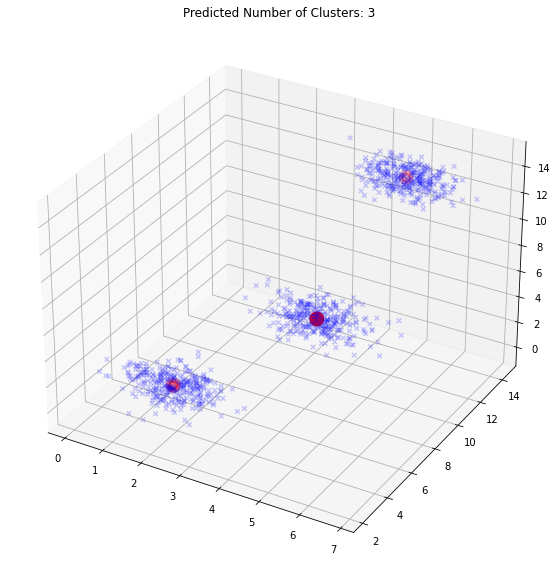

In [35]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker = 'x', color ='blue', alpha=0.2)
ax.scatter(centriods[:, 0], centriods[:, 1], centriods[:, 2], marker= 'o', color='red', s = 100, linewidth=5, zorder=10)
plt.title('Predicted Number of Clusters: %d' % len(np.unique(labels)))
plt.show()

In Mean-Shift clustering, each point try to find its group by moving towards the weighted mean of its local area in each step. The red point as seen in the image is the destination of each point; and that's the centroids of the three clusters. Then, all the data points with the same destination point can be labeled with the same cluster.

As you can see, Mean-Shift algorithm was able to classify different specifies of our data into separate clusters. The identified clusters are simply the distinct patterns our model was able to learn from the data. So essentially, data pints with similar characteristics are grouped together; therefore making the data points in each cluster homogeneous.

Since we had no prior information about this data, there's no way we can magically know what the 3 clusters could be. This is because, the data is synthetic. If the data were to mirror a real life data with proper features, perhaps we could be able to deduce what each respective cluster represents.

# <center> <u> Write A Data Into A Database <u> <center>

> Create a writer using PyMySQL or any other SQL client you might be more con with, to write this data into a database. <br>

- So for this task, I'll be using the data of Machine Learning users extracted from Github API in section A.

In [36]:
import pyodbc

In [37]:
for driver in pyodbc.drivers():
    print(driver)

SQL Server
SQL Server Native Client 11.0
SQL Server Native Client RDA 11.0
ODBC Driver 17 for SQL Server
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)


**Connecting To The Database**

In [38]:
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};' # Connect to the database
                      'SERVER=EMYRS\SQLEXPRESS;'
                      'DATABASE=Practice;'
                      'Trusted_connection=yes;')

cursor = conn.cursor() # Create the connection cursor

**Writing The Query To Import Data Into The Database**

In [39]:
create_table_query = '''

-- Create Table if it doesn't exist in the DB

IF Object_ID('MachineLearning') IS NULL

CREATE TABLE [Practice].[dbo].[MachineLearning]

(
   [user_id] INT NOT NULL,
   [username] NVARCHAR(MAX) NOT NULL,
   [bio] NVARCHAR(MAX) NULL,
   [blog] NVARCHAR(MAX) NULL,
   [company] NVARCHAR(MAX) NULL,
   [email] NVARCHAR(MAX) NULL,
   [followers] INT NOT NULL,
   [following] INT NOT NULL,
   [profile_url] NVARCHAR(MAX) NOT NULL,
   [location] NVARCHAR(MAX) NULL,
)

'''

insert_data_query = ''' INSERT INTO [Practice].[dbo].[MachineLearning]

(
    [user_id],
    [username],
    [bio],
    [blog],
    [company], 
    [email], 
    [followers], 
    [following],  
    [profile_url], 
    [location]
)

VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)

'''

In [40]:
cursor.execute(create_table_query)            #<--- Creating the table in SQL
cursor.commit()                               #<--- Commit the table we just created

In [41]:
MLE_data.fillna(0, inplace=True)

In [42]:
df_records = MLE_data.values.tolist()       #<---Convert the pandas to numpy array then to a list

In [44]:
cursor.executemany(insert_data_query, df_records)   #<--- Write the data in the data base
cursor.commit()                                     #<--- Commit the data we just inserted in the data base

In [45]:
pd.read_sql_query('SELECT top 10 * FROM [dbo].[MachineLearning]', conn)

user_id       username                                                bio  \
0  15997058      korecodes                                  Learning Machine.   
1  12306753    jerryOkafor  Passionate Mobile (Android & iOS) Software Eng...   
2  28939122   ProsperChuks        Software Engineer/Machine Learning Engineer   
3  11761529          cydal         Data Scientist / Machine Learning Engineer   
4  12401108        adefemi  Am all about the graphical fun. Games, machine...   
5  55991846  damilare-akin                      Machine Learning enthusiast.    
6  30703836  peacelovingng  An Aspiring Data Scientist - AADS and Machine ...   
7  34160717      Leigh-Ola    Web developer, Machine Learning afficionado\r\n   
8  58162911   VictorUmunna  Data scientist and Analyst | Machine Learning ...   
9  37702934    Crowntopsss     IOS developer | Machine learning Developer\r\n   

                                         blog                   company  \
0                                           0                         0   
1                             jerryokafor.com                         0   
2  https://www.linkedin.com/in/prosper-chuks/        HDSC FELLOW HAMOYE   
3                                 loud.africa                         0   
4                           adefemi.github.io               WarnerMedia   
5                                           0                         0   
6                              github.com/plv       University of Lagos   
7               https://glitch.com/@Leigh-Ola                         0   
8              https://linktr.ee/VictorUmunna                         0   
9                                           0  Purple Gate Technologies   

                        email  followers  following  \
0       apantakuayo@gmail.com         21         93   
1  jerryhanksokafor@gmail.com         51         32   
2        prosperc40@gmail.com         18         19   
3        cydalsij@outlook.com         17         16   
4  adefemigreat1995@gmail.com         56          0   
5                           0         12         10   
6                           0         14         73   
7         LEOlaotan@gmail.com          8         11   
8                           0         17          2   
9     adebiyitope26@gmail.com          8         18   

                        profile_url         location  
0      https://github.com/korecodes  Lagos, Nigeria.  
1    https://github.com/jerryOkafor            Lagos  
2   https://github.com/ProsperChuks   Lagos, Nigeria  
3          https://github.com/cydal   Lagos, Nigeria  
4        https://github.com/adefemi   Lagos, Nigeria  
5  https://github.com/damilare-akin   Lagos, Nigeria  
6  https://github.com/peacelovingng   Lagos, Nigeria  
7      https://github.com/Leigh-Ola   Lagos, Nigeria  
8   https://github.com/VictorUmunna   Lagos, Nigeria  
9    https://github.com/Crowntopsss            Lagos

In [46]:
cursor.close()
conn.close()     #<--- Close the connection to the database